In [62]:
import numpy as np
import matplotlib.pyplot as plt

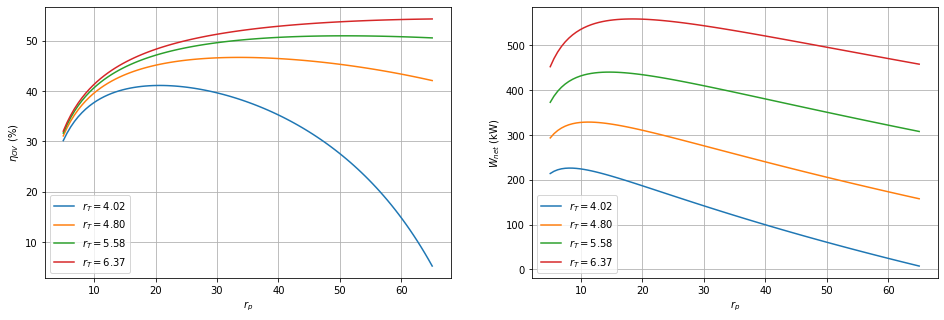

In [63]:

p_0 = 1.01325
T_0 = 298.15
eta_C = 0.90
eta_T = 0.92
rts = (np.linspace(900, 1600, 4) + T_0) / T_0
g = 1.4
gp = (g-1) / g
Cp = 1.005

rps = np.linspace(5, 65, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

for rt in rts:
    novs = 100*(eta_T * rt *(1 - rps**-gp) - (rps**gp - 1)/eta_C)/(rt - 1 - (rps**gp - 1)/eta_C)
    Wnet = Cp * T_0 * (eta_T * rt * (1 - rps**-gp) - (rps**gp - 1)/eta_C)

    ax1.plot(rps, novs, label=f'$r_T = {rt:.2f}$')
    ax2.plot(rps, Wnet, label=f'$r_T = {rt:.2f}$')


ax1.set_xlabel('$r_p$')
ax1.set_ylabel('$\eta_{OV}$ (%)')
ax1.legend()
ax1.grid()

ax2.set_xlabel('$r_p$')
ax2.set_ylabel('$W_{net}$ (kW)')
ax2.legend()
ax2.grid()

plt.savefig('pg_rT_variations.png')
plt.show()

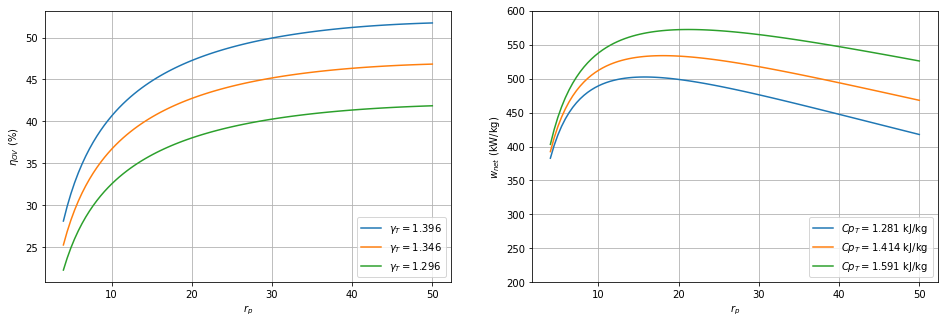

In [70]:
rps = np.linspace(4, 50, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
gci = 1.396
gti = 1.296
gms = np.linspace(gci, gti, 3, endpoint=True)
gc = (gci-1) / gci
gt = (gti-1) / gti

r_Cp = 1281.0 / 1078.3
Cpc = 1078.3
rt = 1150 / T_0 + 1

T_table = np.array([-100, 0, 100, 200, 300, 400, 500, 600, 700, 800]) + 273.15
Cp_table = np.array([1.01, 1.01, 1.02, 1.03, 1.05, 1.07, 1.10, 1.12, 1.14, 1.16])

def lerp_CP(Temp):
    if Temp < -100:
        return 1.01
    if Temp > 800:
        return 1.16
    i = 0
    while Temp > T_table[i]:
        i += 1
    return Cp_table[i-1] + (Cp_table[i] - Cp_table[i-1]) * (Temp - T_table[i-1]) / (T_table[i] - T_table[i-1])


for g in gms:

    gt = (g-1) / g

    if not np.isclose(g, gci):
        r_Cp = gtprev / gt * r_Cp
        
    novs = 100*(r_Cp * eta_T * rt *(1 - rps**-gt) - (rps**gc - 1)/eta_C)/(r_Cp * rt - 1 - (rps**gc - 1)/eta_C)
    Wnet = Cpc * T_0 * ( r_Cp * eta_T * rt * (1 - rps**-gt) - (rps**gc - 1)/eta_C) / 1e3

    ax1.plot(rps, novs, label=f'$\gamma_T = {g:.3f}$')
    ax2.plot(rps, Wnet, label=f'$Cp_T = {Cpc*r_Cp/1e3:.3f}$ kJ/kg')

    gtprev = gt


ax1.set_xlabel('$r_p$')
ax1.set_ylabel('$\eta_{OV}$ (%)')
ax1.legend()
ax1.legend(loc='lower right')
ax1.grid()

ax2.set_xlabel('$r_p$')
ax2.set_ylabel('$w_{net}$ (kW/kg)')
ax2.legend(loc='lower right')
ax2.grid()
ax2.set_ylim(200,600)

plt.savefig('pg_combustor_exit_gamma_variation.png', dpi = 300)
plt.show()

In [65]:

rt = (1150 + 273.15 ) / T_0
gci = 1.396
gti = 1.296
gc = (gci-1) / gci
gt = (gti-1) / gti

r_Cp = 1281.0 / 1078.3

rp = 16
novs = 100*(r_Cp * eta_T * rt *(1 - rp**-gt) - (rp**gc - 1)/eta_C)/(r_Cp * rt - 1 - (rp**gc - 1)/eta_C)
Wnet = Cp * T_0 * (eta_T * rt * (1 - rp**-gt) - (rp**gc - 1)/eta_C)

print(f'At rp = {rp:.2f}, rt = {rt:.2f}, gamma = {g:.2f}, eta_ov = {novs:.2f}%, W_net = {Wnet:.2f} kW')

At rp = 16.00, rt = 4.77, gamma = 1.30, eta_ov = 33.48%, W_net = 219.22 kW
